Régression de 'Espérance de vie en bonne santé totale' sur '2019'
                                      OLS Regression Results                                      
Dep. Variable:     Espérance de vie en bonne santé totale   R-squared:                       0.455
Model:                                                OLS   Adj. R-squared:                  0.452
Method:                                     Least Squares   F-statistic:                     147.9
Date:                                    Sat, 06 Dec 2025   Prob (F-statistic):           4.03e-25
Time:                                            11:48:57   Log-Likelihood:                -519.78
No. Observations:                                     179   AIC:                             1044.
Df Residuals:                                         177   BIC:                             1050.
Df Model:                                               1                                         
Covariance Type:                           

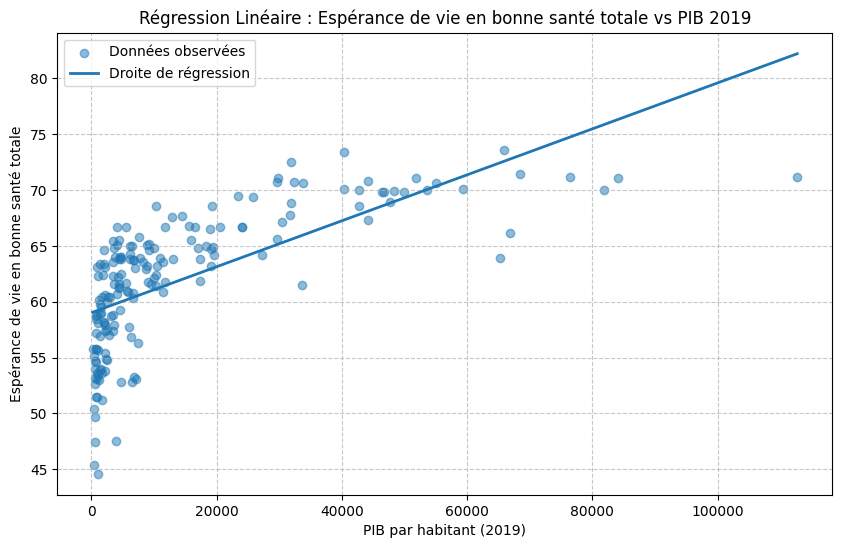

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 1. Charger les données
file_path = '/home/onyxia/python-DATA-1/Table_fusion_OMS_PIB.csv'
df = pd.read_csv(file_path)

# Variables
colonne_Y = 'Espérance de vie en bonne santé totale'
colonne_D = '2019'   # PIB 2019

print(f"Régression de '{colonne_Y}' sur '{colonne_D}'")

# 2. Nettoyage
data_reg = df[[colonne_Y, colonne_D]].dropna()

if len(data_reg) == 0:
    print("Erreur : Plus aucune donnée après suppression des valeurs manquantes.")
else:
    # 3. Variables
    Y = data_reg[colonne_Y]
    D = data_reg[colonne_D]
    X = sm.add_constant(D)

    # 4. Régression
    model = sm.OLS(Y, X)
    results = model.fit()

    print(results.summary())

    # 5. TRI POUR DROITE PROPRE
    data_reg_sorted = data_reg.sort_values(by=colonne_D)
    X_sorted = sm.add_constant(data_reg_sorted[colonne_D])

    # 6. GRAPHIQUE
    plt.figure(figsize=(10, 6))

    plt.scatter(
        data_reg[colonne_D],
        data_reg[colonne_Y],
        alpha=0.5,
        label='Données observées'
    )

    plt.plot(
        data_reg_sorted[colonne_D],
        results.predict(X_sorted),
        linewidth=2,
        label='Droite de régression'
    )

    plt.title(f'Régression Linéaire : {colonne_Y} vs PIB 2019')
    plt.xlabel('PIB par habitant (2019)')
    plt.ylabel(colonne_Y)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()